### Binary classification problem - heart disease




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

####  Target values: 1- with heart disease, 0 - without heart disease

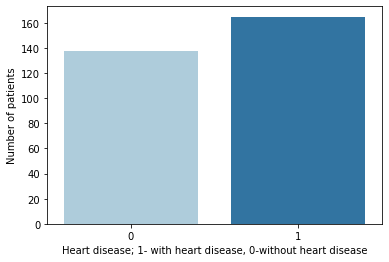

In [4]:
data.target.value_counts()
sb.countplot(x="target", data=data, palette="Paired")
plt.xlabel('Heart disease; 1- with heart disease, 0-without heart disease')
plt.ylabel('Number of patients')
plt.show()

####  Total number of female patients - 0, total number of male patients - 1

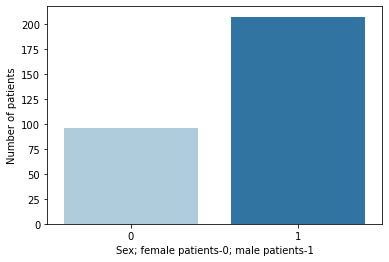

In [5]:
data.sex.value_counts()
sb.countplot(x="sex", data=data, palette="Paired")
plt.xlabel('Sex; female patients-0; male patients-1')
plt.ylabel('Number of patients')
plt.show()

####  Total number of female patients - 0 with/without disease , total number of male patients - 1 with/without disease

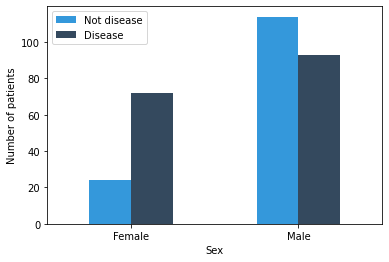

In [6]:
pd.crosstab(data.sex,data.target).plot(kind="bar",color=['#3498db','#34495e' ])
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.xticks(np.arange(2),("Female","Male"))
plt.legend(["Not disease", "Disease"])
plt.ylabel('Number of patients')
plt.show()

#### Serum cholestoral in mg/dl

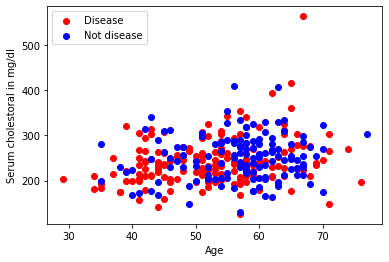

In [7]:
plt.scatter(data.age[data.target==1], data.chol[(data.target==1)], c="red")
plt.scatter(data.age[data.target==0], data.chol[(data.target==0)], c="blue")
plt.legend(["Disease", "Not disease"])
plt.xlabel("Age")
plt.ylabel("Serum cholestoral in mg/dl")
plt.show()

#### Maximum heart rate achieved

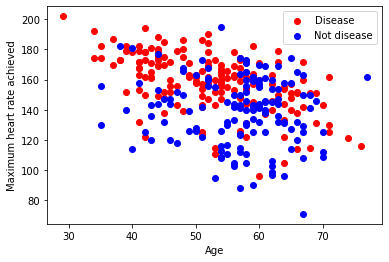

In [8]:
plt.scatter(data.age[data.target==1], data.thalach[(data.target==1)], c="red")
plt.scatter(data.age[data.target==0], data.thalach[(data.target==0)], c="blue")
plt.legend(["Disease", "Not disease"])
plt.xlabel("Age")
plt.ylabel("Maximum heart rate achieved")
plt.show()

#### Total number with different types of chest pain  

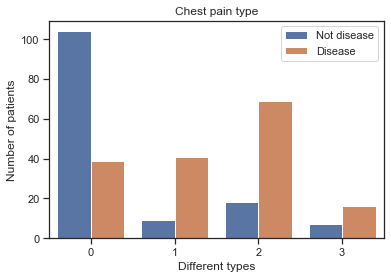

In [9]:
sb.set(style="ticks", color_codes=True)
plt.title('Chest pain type')
sb.countplot(x='cp', hue='target', data=data)
plt.xticks(np.arange(4),("0","1","2","3"))
plt.ylabel('Number of patients')
plt.xlabel('Different types')
plt.legend(["Not disease","Disease"])


#### Total number of patients with different types of fasting blood sugar 

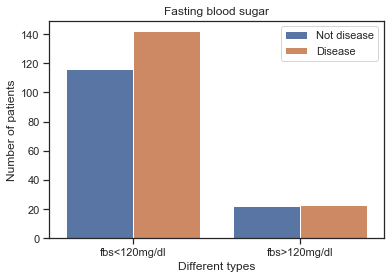

In [10]:
sb.set(style="ticks", color_codes=True)
plt.title('Fasting blood sugar')
sb.countplot(x='fbs', hue='target', data=data)
plt.xticks(np.arange(2),("fbs<120mg/dl","fbs>120mg/dl"))
plt.ylabel('Number of patients')
plt.xlabel('Different types')
plt.legend(["Not disease","Disease"])


#### Normalization

In [11]:
data = np.array(data.values)
features = data[:,:13]
features = preprocessing.normalize(features, axis=0, norm= 'max')
target = data[:,13]

#### Splitting data on train and test sets -  70:30

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [13]:
algorithms = []
acc = []

#### Logistic Regression

In [14]:
logReg = LogisticRegression(random_state=0,penalty='l2').fit(X_train, y_train)
pred_y = logReg.predict(X_test)
accuracy = round(accuracy_score(y_test, pred_y),2)
precision = round(precision_score(y_test, pred_y),2)
recall = round(recall_score(y_test, pred_y),2)
f1 =round(f1_score(y_test, pred_y),2)
print("Accuracy on test data - logistic regression model: ", accuracy)
print("Precision on test data - logistic regression model: ", precision)
print("Recall on test data - logistic regression model: ", recall)
print("F1 score on test data - logistic regression model: ", f1)
algorithms.append("Logistic Regression")
acc.append(accuracy)


Accuracy on test data - logistic regression model:  0.82
Precision on test data - logistic regression model:  0.81
Recall on test data - logistic regression model:  0.88
F1 score on test data - logistic regression model:  0.84


c:\users\andje\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(2.5, -0.5)

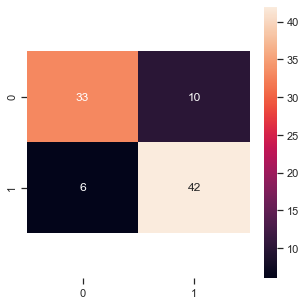

In [15]:
cm = confusion_matrix(y_test, pred_y)
plt.rcParams['figure.figsize'] = (5, 5)
ax = sb.heatmap(cm, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


#### Decision tree 

In [16]:
decisionTree = DecisionTreeClassifier(random_state=0, criterion = 'entropy', splitter = 'best', min_samples_split=3, min_samples_leaf=1).fit(X_train, y_train)
pred_y = decisionTree.predict(X_test)
accuracy = round(accuracy_score(y_test, pred_y),2)
precision = round(precision_score(y_test, pred_y),2)
recall = round(recall_score(y_test, pred_y),2)
f1 =round(f1_score(y_test, pred_y),2)
print("Accuracy on test data - decision tree model: ", accuracy)
print("Precision on test data - decision tree model: ", precision)
print("Recall on test data - decision tree model: ", recall)
print("F1 score on test data - decision tree model: ", f1)
algorithms.append("Decision tree")
acc.append(accuracy)

Accuracy on test data - decision tree model:  0.78
Precision on test data - decision tree model:  0.82
Recall on test data - decision tree model:  0.75
F1 score on test data - decision tree model:  0.78


(2.5, -0.5)

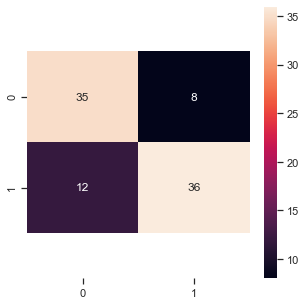

In [17]:
cm = confusion_matrix(y_test, pred_y)
plt.rcParams['figure.figsize'] = (5, 5)
ax = sb.heatmap(cm, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


#### Random forest 

In [18]:
randomForest = RandomForestClassifier(n_estimators = 50, max_depth = 5).fit(X_train, y_train)
pred_y = randomForest.predict(X_test)
accuracy = round(accuracy_score(y_test, pred_y),2)
precision = round(precision_score(y_test, pred_y),2)
recall = round(recall_score(y_test, pred_y),2)
f1 =round(f1_score(y_test, pred_y),2)
print("Accuracy on test data - random forest model: ", accuracy)
print("Precision on test data - random forest model: ", precision)
print("Recall on test data - random forest model: ", recall)
print("F1 score on test data - random forest model: ", f1)
algorithms.append("Random forest")
acc.append(accuracy)

Accuracy on test data - random forest model:  0.86
Precision on test data - random forest model:  0.84
Recall on test data - random forest model:  0.9
F1 score on test data - random forest model:  0.87


(2.5, -0.5)

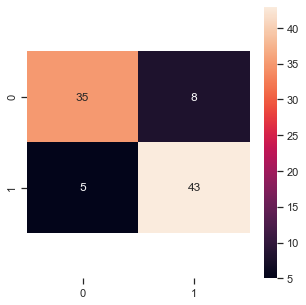

In [19]:
cm = confusion_matrix(y_test, pred_y)
plt.rcParams['figure.figsize'] = (5, 5)
ax = sb.heatmap(cm, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### K nearest neighbors 

In [20]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
pred_y = knn.predict(X_test)
accuracy = round(accuracy_score(y_test, pred_y),2)
precision = round(precision_score(y_test, pred_y),2)
recall = round(recall_score(y_test, pred_y),2)
f1 =round(f1_score(y_test, pred_y),2)
print("Accuracy on test data - KNN model: ", accuracy)
print("Precision on test data - KNN model: ", precision)
print("Recall on test data - KNN model: ", recall)
print("F1 score on test data - KNN model: ", f1)
algorithms.append("KNN")
acc.append(accuracy)


Accuracy on test data - KNN model:  0.81
Precision on test data - KNN model:  0.8
Recall on test data - KNN model:  0.85
F1 score on test data - KNN model:  0.83


(2.5, -0.5)

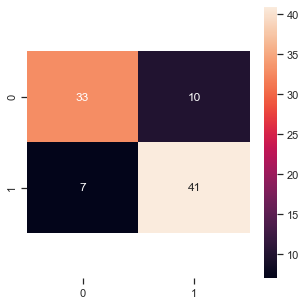

In [21]:
cm = confusion_matrix(y_test, pred_y)
plt.rcParams['figure.figsize'] = (5, 5)
ax = sb.heatmap(cm, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Best algorithm

In [22]:
best_acc = max(acc)
print("The best algorithm:",algorithms[acc.index(best_acc)],"\nAccuracy: ",best_acc)

The best algorithm: Random forest 
Accuracy:  0.86
